In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('power plant data.xlsx')

In [3]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

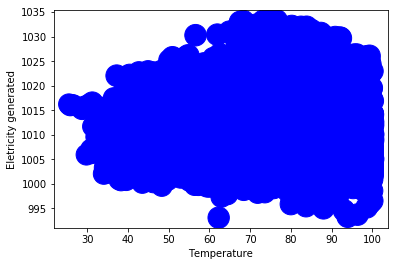

In [8]:
plt.scatter(train.RH,train.PE,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Eletricity generated")
plt.show()

In [15]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
x = np.asanyarray(train[['AT','V','AP','RH']])
y = np.asanyarray(train[['PE']])
lm.fit (x, y)
# The coefficients
print ('Coefficients: ', lm.coef_)

Coefficients:  [[-1.95873896 -0.24140332  0.07638351 -0.15773241]]


In [14]:
y_hat= lm.predict(test[['AT','V','AP','RH']])
x = np.asanyarray(test[['AT','V','AP','RH']])
y = np.asanyarray(test[['PE']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm.score(x, y))

Residual sum of squares: 19.73
Variance score: 0.93


ValueError: shapes (1858,1) and (4,1) not aligned: 1 (dim 1) != 4 (dim 0)